In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore,location
0,abc,mno,12.0,m,90.0,65.0,NaN
1,NaN,NaN,NaN,NaN,90.0,?,NaN
2,ghi,pqr,12.0,f,-,65.0,?
3,jkl,stu,12.0,f,90.0,62.0,NaN
4,mno,vwx,12.0,m,89.0,63.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstName      4 non-null      object 
 1   LastName       4 non-null      object 
 2   Age            4 non-null      float64
 3   Sex            4 non-null      object 
 4   preTestScore   5 non-null      object 
 5   postTestScore  5 non-null      object 
 6   location       1 non-null      object 
dtypes: float64(1), object(6)
memory usage: 412.0+ bytes


In [5]:
missing_values = [ 'n/a', '-', '?' ]

df = pd.read_csv('data.csv', na_values=missing_values)

df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore,location
0,abc,mno,12.0,m,90.0,65.0,NaN
1,NaN,NaN,NaN,NaN,90.0,NaN,NaN
2,ghi,pqr,12.0,f,NaN,65.0,NaN
3,jkl,stu,12.0,f,90.0,62.0,NaN
4,mno,vwx,12.0,m,89.0,63.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstName      4 non-null      object 
 1   LastName       4 non-null      object 
 2   Age            4 non-null      float64
 3   Sex            4 non-null      object 
 4   preTestScore   4 non-null      float64
 5   postTestScore  4 non-null      float64
 6   location       0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 412.0+ bytes


In [7]:
df.isnull()

,FirstName,LastName,Age,Sex,preTestScore,postTestScore,location
0,False,False,False,False,False,False,True
1,True,True,True,True,False,True,True
2,False,False,False,False,True,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True


In [8]:
df.isnull().sum()

FirstName        1
LastName         1
Age              1
Sex              1
preTestScore     1
postTestScore    1
location         5
dtype: int64

In [13]:
df.isnull().any(axis=0)

FirstName        True
LastName         True
Age              True
Sex              True
preTestScore     True
postTestScore    True
location         True
dtype: bool

In [15]:
df.isnull().all(axis=0)

FirstName        False
LastName         False
Age              False
Sex              False
preTestScore     False
postTestScore    False
location          True
dtype: bool

In [16]:
df.isnull().all(axis=0).sum()

np.int64(1)

In [17]:
df.isnull().all(axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [19]:
#calculating the percent of null values for each column
(df.isnull().sum()/len(df.index)) * 100

FirstName         20.0
LastName          20.0
Age               20.0
Sex               20.0
preTestScore      20.0
postTestScore     20.0
location         100.0
dtype: float64

In [ ]:
#the location has 100%, which means that the entire column is made up of null values
#removing the location column
df.dropna(axis=1, how='all', inplace=True)
df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore
0,abc,mno,12.0,m,90.0,65.0
1,NaN,NaN,NaN,NaN,90.0,NaN
2,ghi,pqr,12.0,f,NaN,65.0
3,jkl,stu,12.0,f,90.0,62.0
4,mno,vwx,12.0,m,89.0,63.0


In [27]:
# Missing values treatment in rows - Removing rows
df[df.isnull().sum(axis=1)>=4]



,FirstName,LastName,Age,Sex,preTestScore,postTestScore
1,NaN,NaN,NaN,NaN,90.0,NaN


In [30]:
#retaining the rows having <=4 NaNs

df = df[df.isnull().sum(axis=1) <= 4]
df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore
0,abc,mno,12.0,m,90.0,65.0
2,ghi,pqr,12.0,f,NaN,65.0
3,jkl,stu,12.0,f,90.0,62.0
4,mno,vwx,12.0,m,89.0,63.0


In [31]:
df.describe()

,Age,preTestScore,postTestScore
count,4.0,3.000000,4.00
mean,12.0,89.666667,63.75
std,0.0,0.577350,1.50
min,12.0,89.000000,62.00
25%,12.0,89.500000,62.75
50%,12.0,90.000000,64.00
75%,12.0,90.000000,65.00
max,12.0,90.000000,65.00


In [32]:
df['preTestScore'].describe()

count     3.000000
mean     89.666667
std       0.577350
min      89.000000
25%      89.500000
50%      90.000000
75%      90.000000
max      90.000000
Name: preTestScore, dtype: float64

In [34]:
df.loc[:, 'preTestScore'] = df['preTestScore'].fillna(df['preTestScore'].mean())
df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore
0,abc,mno,12.0,m,90.000000,65.0
2,ghi,pqr,12.0,f,89.666667,65.0
3,jkl,stu,12.0,f,90.000000,62.0
4,mno,vwx,12.0,m,89.000000,63.0


In [36]:
df = pd.read_csv('data.csv', na_values=missing_values)

In [39]:
df_num = df.select_dtypes(include=['number'])
df_num

,Age,preTestScore,postTestScore,location
0,12.0,90.0,65.0,NaN
1,NaN,90.0,NaN,NaN
2,12.0,NaN,65.0,NaN
3,12.0,90.0,62.0,NaN
4,12.0,89.0,63.0,NaN


In [40]:
df_num2 = df_num.drop(['location'], axis=1)
df_num2

,Age,preTestScore,postTestScore
0,12.0,90.0,65.0
1,NaN,90.0,NaN
2,12.0,NaN,65.0
3,12.0,90.0,62.0
4,12.0,89.0,63.0


In [42]:
#explicitly ask for this experimental feature

from sklearn.experimental import enable_iterative_imputer

# then import the library
from sklearn.impute import IterativeImputer

In [48]:
# Initialize it
iterimp = IterativeImputer()

df_iterimp = pd.DataFrame(iterimp.fit_transform(df_num2), columns=df_num2.columns, index=df_num2.index)

df_iterimp

,Age,preTestScore,postTestScore
0,12.0,90.000000,65.000000
1,12.0,90.000000,63.750226
2,12.0,89.751133,65.000000
3,12.0,90.000000,62.000000
4,12.0,89.000000,63.000000


In [49]:
#dropping the location column since it contains all null values

iterimp.fit_transform(df_num2)

array([[12.        , 90.        , 65.        ],
       [12.        , 90.        , 63.75022648],
       [12.        , 89.75113289, 65.        ],
       [12.        , 90.        , 62.        ],
       [12.        , 89.        , 63.        ]])

In [57]:
from sklearn.impute import  SimpleImputer

mean_imputer = SimpleImputer(strategy = 'mean')   # median can also be used

df_mean_imp = pd.DataFrame(mean_imputer.fit_transform(df_num2), columns=df_num2.columns, index=df_num2.index)


df_mean_imp

,Age,preTestScore,postTestScore
0,12.0,90.00,65.00
1,12.0,90.00,63.75
2,12.0,89.75,65.00
3,12.0,90.00,62.00
4,12.0,89.00,63.00


In [58]:
df_mean_imp.isnull().sum()

Age              0
preTestScore     0
postTestScore    0
dtype: int64

In [59]:
# Mean Imputation
#mean_imputer = SimpleImputer(strategy='mean')

# Median Imputation
#median_imputer = SimpleImputer(strategy='median')

# Most Frequent Imputation
#mode_imputer = SimpleImputer(strategy='most_frequent')

# Constant Imputation
#constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

In [60]:
mean_imputer.fit_transform(df_num2)

array([[12.  , 90.  , 65.  ],
       [12.  , 90.  , 63.75],
       [12.  , 89.75, 65.  ],
       [12.  , 90.  , 62.  ],
       [12.  , 89.  , 63.  ]])

In [65]:
from sklearn.impute import  KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

df_knn_imp = pd.DataFrame(knn_imputer.fit_transform(df_num2), columns=df_num2.columns, index=df_num2.index)

df_knn_imp

,Age,preTestScore,postTestScore
0,12.0,90.000000,65.000000
1,12.0,90.000000,63.333333
2,12.0,89.666667,65.000000
3,12.0,90.000000,62.000000
4,12.0,89.000000,63.000000


In [66]:
knn_imputer.fit_transform(df_num2)

array([[12.        , 90.        , 65.        ],
       [12.        , 90.        , 63.33333333],
       [12.        , 89.66666667, 65.        ],
       [12.        , 90.        , 62.        ],
       [12.        , 89.        , 63.        ]])

In [68]:
from sklearn.impute import  MissingIndicator

x_array = np.array([[-1, -1, 3, 7],
                   [4, 6, 0, -1],
                   [-1, 1, 6,2]])

indicator = MissingIndicator(missing_values=-1)

mask_missing_values_only = indicator.fit_transform(x_array)
mask_missing_values_only

array([[ True,  True, False],
       [False, False,  True],
       [ True, False, False]])

In [ ]:
#to check the columns that were returned
indicator.features_

array([0, 1, 3])

In [70]:
indicator = MissingIndicator(missing_values= -1, features='all')

mask_all = indicator.fit_transform(x_array)
mask_all

array([[ True,  True, False, False],
       [False, False, False,  True],
       [ True, False, False, False]])

In [71]:
indicator.features_

array([0, 1, 2, 3])

In [79]:
from sklearn.impute import  SimpleImputer, MissingIndicator

from sklearn.pipeline import FeatureUnion

transformer = FeatureUnion(transformer_list=[('features', SimpleImputer(strategy='mean')), ('indicator', MissingIndicator())])



results = pd.DataFrame(transformer.fit_transform(df_num2), index=df_num2.index)

results

,0,1,2,3,4,5
0,12.0,90.00,65.00,0.0,0.0,0.0
1,12.0,90.00,63.75,1.0,0.0,1.0
2,12.0,89.75,65.00,0.0,1.0,0.0
3,12.0,90.00,62.00,0.0,0.0,0.0
4,12.0,89.00,63.00,0.0,0.0,0.0


In [80]:
results.columns = ['Age', 'preTestScore', 'postTestScore', 'is_null_age', 'is_null_preTest', 'is_null_postTest']
results

,Age,preTestScore,postTestScore,is_null_age,is_null_preTest,is_null_postTest
0,12.0,90.00,65.00,0.0,0.0,0.0
1,12.0,90.00,63.75,1.0,0.0,1.0
2,12.0,89.75,65.00,0.0,1.0,0.0
3,12.0,90.00,62.00,0.0,0.0,0.0
4,12.0,89.00,63.00,0.0,0.0,0.0


# Outliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('weight-height.xls')

df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.drop('Weight', axis=1, inplace=True)

In [6]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


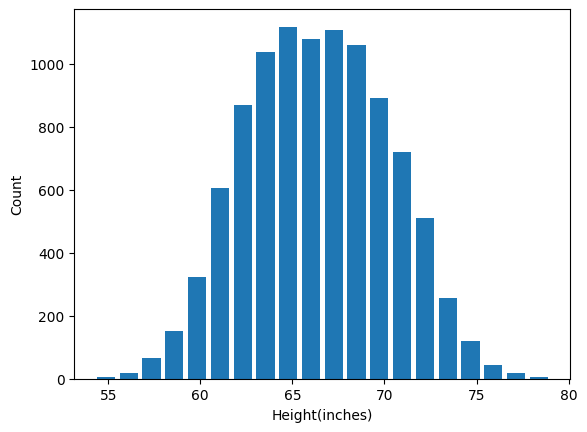

In [13]:
plt.hist(df.Height, rwidth=0.8, bins=20)
plt.xlabel("Height(inches)")
plt.ylabel("Count")

plt.show()

In [14]:
#to include the bell curve

from scipy.stats import norm
import numpy as np

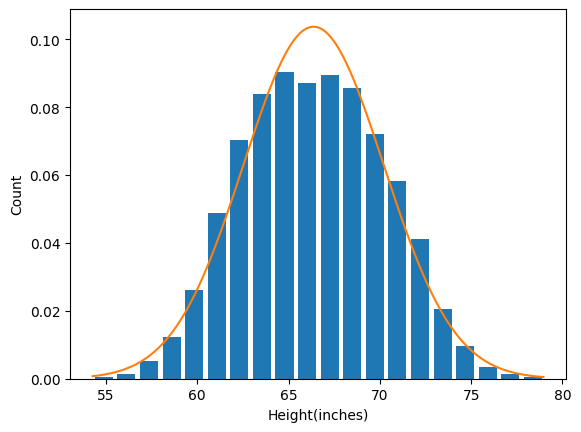

In [15]:
plt.hist(df.Height, bins=20, rwidth=0.8, density = True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

#plotting the bell curve
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()

In [16]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [18]:
# Using the three standard deviation to remove outliers from the data. This is the most used.
# figuring our the upper limit

upper_limit = df.Height.mean() + 3 * df.Height.std()

upper_limit

np.float64(77.91014411714093)

In [19]:
# figuring our the lower limit

lower_limit = df.Height.mean() - 3 * df.Height.std()

lower_limit

np.float64(54.82497539250156)

In [22]:
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [25]:
new_df = df[(df.Height < upper_limit) & (df.Height > lower_limit)]

new_df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9993 non-null   object 
 1   Height  9993 non-null   float64
dtypes: float64(1), object(1)
memory usage: 234.2+ KB


In [ ]:
# Using Z-score



In [31]:
df['zscore'] = ((df.Height - df.Height.mean()) / df.Height.std())

df

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [35]:
df['zscore'].min()

np.float64(-3.146026760498775)

In [34]:
df['zscore'].max()


np.float64(3.282934443902102)

In [38]:
new_df2 = df[(df['zscore'] < 3) & (df['zscore'] > -3)]

new_df2

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [ ]:
# using IQR



In [39]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

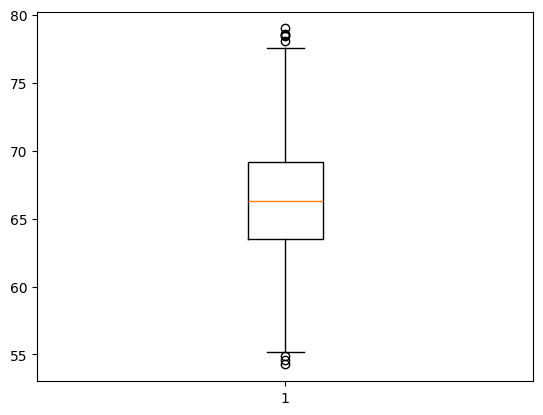

In [40]:
plt.boxplot(df.Height)
plt.show()